In [1]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import pandas as pd
import random

import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator

from itertools import combinations

Using TensorFlow backend.


In [2]:
classes = ["elliptical", "spiral"]
img_channels = list("ugriz")

def load_images():
    img_data = []
    labels = []
    for aClass in classes:
        files = glob.glob("final_dataset/"+aClass+"/*.npz")
        for file_name in files:
            img = np.load(file_name)
            img = np.array(list(map(lambda channel: img[channel], img_channels)))
            img_data.append(img)
            labels.append(classes.index(aClass))
    return img_data, labels

img_data, labels = load_images()
img_data = np.array(img_data)
labels = np.array(labels)

In [3]:
#shuffle the data
shuffle = np.arange(img_data.shape[0])
np.random.shuffle(shuffle)
img_data = img_data[shuffle]
labels = labels[shuffle]
print(f"img_data shape: {img_data.shape}")
img_data = np.transpose(img_data, (0, 2, 3, 1))
img_data = img_data/np.amax(img_data)
print(img_data.shape)
print(labels.shape)

img_data shape: (2275, 5, 200, 200)
(2275, 200, 200, 5)
(2275,)


Galaxy type: spiral


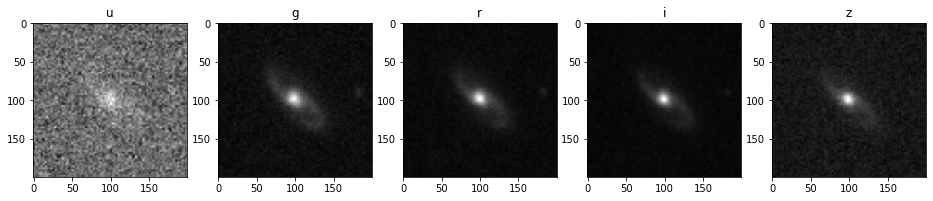

In [4]:
fig=plt.figure(figsize=(16, 16))
columns = len(img_channels)
rows = 1
print(f"Galaxy type: {classes[labels[0]]}")
for i in range(0, len(img_channels)):
    img = img_data[0]
    fig.add_subplot(rows, columns, i+1)
    plt.title(img_channels[i])
    #using gray because I'm not sure how a single channel that is not even part of RGB should be displayed
    plt.imshow(img[:,:,i], cmap="gray")
plt.show()

In [5]:
def CNN(img_channels, img_rows, img_cols, verbose=False):
    # some hyperparamters you can chage
    dropoutpar = 0.5
    nb_dense = 64

    model = Sequential()
    model.add(Conv2D(128, (3, 3), border_mode='same',
                            input_shape=(img_rows, img_cols, img_channels)))
    model.add(Activation('relu'))
    model.add(Dropout(0.25))

    model.add(Conv2D(256, (3, 3), border_mode='same'))
    model.add(Activation('relu'))

    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

#     model.add(Conv2D(256, (3, 3), border_mode='same'))
#     model.add(Activation('relu'))

#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Dropout(0.25))

    model.add(Conv2D(128, (3, 3), border_mode='same'))
    model.add(Activation('relu'))

    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), border_mode='same'))
    model.add(Activation('relu'))

    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(nb_dense, activation='relu'))
    model.add(Dropout(dropoutpar))
    model.add(Dense(1, init='uniform', activation='sigmoid'))
    print("Compilation...")

    model.compile(loss='binary_crossentropy', optimizer='adam',
                  metrics=['accuracy'])
    print("... done!")
    if verbose is True:
        print("Model Summary")
        print("===================")
        model.summary()
    return model

In [6]:
model = CNN(img_data.shape[3], img_data.shape[1], img_data.shape[2], verbose = True)
metrics = model.fit(img_data, labels, batch_size=16, validation_split=0.3, epochs=30)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), input_shape=(200, 200,..., padding="same")`
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), padding="same")`
  if sys.path[0] == '':
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), padding="same")`
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same")`
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: Update your `Dense` call to

Compilation...
... done!
Model Summary
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 200, 200, 128)     5888      
_________________________________________________________________
activation_1 (Activation)    (None, 200, 200, 128)     0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 200, 200, 128)     0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 200, 200, 256)     295168    
_________________________________________________________________
activation_2 (Activation)    (None, 200, 200, 256)     0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 100, 100, 256)     0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 1

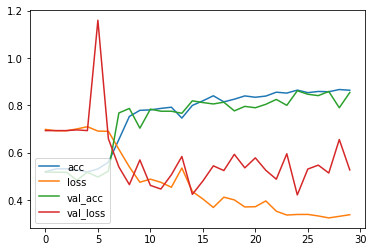

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 200, 200, 128)     5888      
_________________________________________________________________
activation_1 (Activation)    (None, 200, 200, 128)     0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 200, 200, 128)     0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 200, 200, 256)     295168    
_________________________________________________________________
activation_2 (Activation)    (None, 200, 200, 256)     0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 100, 100, 256)     0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 100, 100, 256)     0         
__________

In [7]:
plt.plot(metrics.history["acc"])
plt.plot(metrics.history["loss"])
plt.plot(metrics.history["val_acc"])
plt.plot(metrics.history["val_loss"])
plt.legend(["acc", "loss", "val_acc", "val_loss"], loc=3)
plt.show()

model.summary()

Train on 1592 samples, validate on 683 samples
Epoch 1/30
1592/1592 [==============================] - 9s 5ms/step - loss: 0.6913 - acc: 0.5245 - val_loss: 0.6922 - val_acc: 0.5168
Epoch 2/30
1592/1592 [==============================] - 8s 5ms/step - loss: 0.6852 - acc: 0.5371 - val_loss: 0.6778 - val_acc: 0.5168
Epoch 3/30
1592/1592 [==============================] - 8s 5ms/step - loss: 0.6431 - acc: 0.6426 - val_loss: 0.6051 - val_acc: 0.5242
Epoch 4/30
1592/1592 [==============================] - 8s 5ms/step - loss: 0.5468 - acc: 0.7519 - val_loss: 0.4831 - val_acc: 0.7965
Epoch 5/30
1592/1592 [==============================] - 8s 5ms/step - loss: 0.4946 - acc: 0.7651 - val_loss: 0.4563 - val_acc: 0.7862
Epoch 6/30
1592/1592 [==============================] - 8s 5ms/step - loss: 0.4997 - acc: 0.7613 - val_loss: 0.4653 - val_acc: 0.8038
Epoch 7/30
1592/1592 [==============================] - 8s 5ms/step - loss: 0.4608 - acc: 0.7946 - val_loss: 0.4339 - val_acc: 0.8053
Epoch 8/30
1592

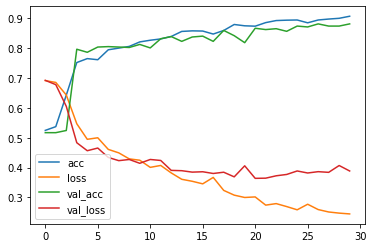

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 198, 198, 32)      1472      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 97, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 46, 46, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 23, 23, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 67712)             0         
__________

In [8]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(img_data.shape[1], img_data.shape[2], img_data.shape[3]), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer=keras.optimizers.Adam(lr=0.0001), metrics=["accuracy"])

metrics = model.fit(img_data, labels, batch_size=32, validation_split=0.3, epochs=30)

plt.plot(metrics.history["acc"])
plt.plot(metrics.history["loss"])
plt.plot(metrics.history["val_acc"])
plt.plot(metrics.history["val_loss"])
plt.legend(["acc", "loss", "val_acc", "val_loss"], loc=3)
plt.show()

model.summary()

Train on 1592 samples, validate on 683 samples
Epoch 1/30
1592/1592 [==============================] - 8s 5ms/step - loss: 0.6933 - acc: 0.5163 - val_loss: 0.6918 - val_acc: 0.5168
Epoch 2/30
1592/1592 [==============================] - 8s 5ms/step - loss: 0.6904 - acc: 0.5314 - val_loss: 0.6893 - val_acc: 0.5168
Epoch 3/30
1592/1592 [==============================] - 7s 5ms/step - loss: 0.6840 - acc: 0.5653 - val_loss: 0.6753 - val_acc: 0.6384
Epoch 4/30
1592/1592 [==============================] - 7s 5ms/step - loss: 0.6242 - acc: 0.6482 - val_loss: 0.5516 - val_acc: 0.7467
Epoch 5/30
1592/1592 [==============================] - 7s 5ms/step - loss: 0.5281 - acc: 0.7494 - val_loss: 0.5108 - val_acc: 0.7306
Epoch 6/30
1592/1592 [==============================] - 7s 5ms/step - loss: 0.5022 - acc: 0.7619 - val_loss: 0.4871 - val_acc: 0.7848
Epoch 7/30
1592/1592 [==============================] - 8s 5ms/step - loss: 0.4886 - acc: 0.7739 - val_loss: 0.4554 - val_acc: 0.7862
Epoch 8/30
1592

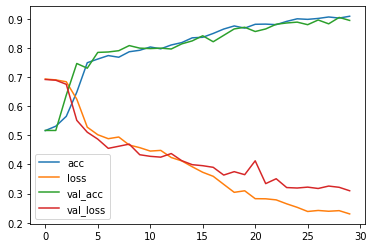

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 198, 198, 32)      1472      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 97, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 46, 46, 128)       73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 23, 23, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 21, 21, 64)        73792     
__________

In [9]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(img_data.shape[1], img_data.shape[2], img_data.shape[3]), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer=keras.optimizers.Adam(lr=0.0001), metrics=["accuracy"])

metrics = model.fit(img_data, labels, batch_size=32, validation_split=0.3, epochs=30)

plt.plot(metrics.history["acc"])
plt.plot(metrics.history["loss"])
plt.plot(metrics.history["val_acc"])
plt.plot(metrics.history["val_loss"])
plt.legend(["acc", "loss", "val_acc", "val_loss"], loc=3)
plt.show()

model.summary()

Train on 1592 samples, validate on 683 samples
Epoch 1/30
1592/1592 [==============================] - 8s 5ms/step - loss: 0.6930 - acc: 0.5308 - val_loss: 0.6925 - val_acc: 0.5168
Epoch 2/30
1592/1592 [==============================] - 8s 5ms/step - loss: 0.6907 - acc: 0.5314 - val_loss: 0.6903 - val_acc: 0.5168
Epoch 3/30
1592/1592 [==============================] - 8s 5ms/step - loss: 0.6872 - acc: 0.5314 - val_loss: 0.6803 - val_acc: 0.5168
Epoch 4/30
1592/1592 [==============================] - 8s 5ms/step - loss: 0.6466 - acc: 0.6225 - val_loss: 0.5534 - val_acc: 0.7540
Epoch 5/30
1592/1592 [==============================] - 8s 5ms/step - loss: 0.5357 - acc: 0.7525 - val_loss: 0.4937 - val_acc: 0.8009
Epoch 6/30
1592/1592 [==============================] - 8s 5ms/step - loss: 0.5115 - acc: 0.7651 - val_loss: 0.5215 - val_acc: 0.7701
Epoch 7/30
1592/1592 [==============================] - 8s 5ms/step - loss: 0.4869 - acc: 0.7751 - val_loss: 0.4601 - val_acc: 0.8067
Epoch 8/30
1592

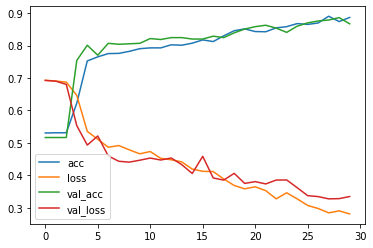

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 198, 198, 32)      1472      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 97, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 48, 48, 64)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 46, 46, 128)       73856     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 23, 23, 128)       0         
__________

In [10]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(img_data.shape[1], img_data.shape[2], img_data.shape[3]), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer=keras.optimizers.Adam(lr=0.0001), metrics=["accuracy"])

metrics = model.fit(img_data, labels, batch_size=32, validation_split=0.3, epochs=30)

plt.plot(metrics.history["acc"])
plt.plot(metrics.history["loss"])
plt.plot(metrics.history["val_acc"])
plt.plot(metrics.history["val_loss"])
plt.legend(["acc", "loss", "val_acc", "val_loss"], loc=3)
plt.show()

model.summary()

Train on 1592 samples, validate on 683 samples
Epoch 1/30
1592/1592 [==============================] - 8s 5ms/step - loss: 0.6919 - acc: 0.5157 - val_loss: 0.6914 - val_acc: 0.5168
Epoch 2/30
1592/1592 [==============================] - 7s 5ms/step - loss: 0.6900 - acc: 0.5314 - val_loss: 0.6902 - val_acc: 0.5168
Epoch 3/30
1592/1592 [==============================] - 7s 5ms/step - loss: 0.6821 - acc: 0.5314 - val_loss: 0.6594 - val_acc: 0.5183
Epoch 4/30
1592/1592 [==============================] - 7s 5ms/step - loss: 0.5956 - acc: 0.6476 - val_loss: 0.5395 - val_acc: 0.7965
Epoch 5/30
1592/1592 [==============================] - 7s 5ms/step - loss: 0.5050 - acc: 0.7638 - val_loss: 0.4522 - val_acc: 0.7877
Epoch 6/30
1592/1592 [==============================] - 7s 5ms/step - loss: 0.4937 - acc: 0.7770 - val_loss: 0.4370 - val_acc: 0.8053
Epoch 7/30
1592/1592 [==============================] - 7s 5ms/step - loss: 0.4753 - acc: 0.7871 - val_loss: 0.4381 - val_acc: 0.8082
Epoch 8/30
1592

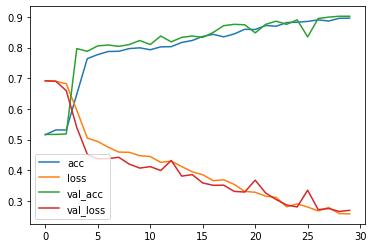

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 198, 198, 32)      1472      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 97, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 46, 46, 128)       73856     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 23, 23, 128)       0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 23, 23, 128)       0         
__________

In [11]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(img_data.shape[1], img_data.shape[2], img_data.shape[3]), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer=keras.optimizers.Adam(lr=0.0001), metrics=["accuracy"])

metrics = model.fit(img_data, labels, batch_size=32, validation_split=0.3, epochs=30)

plt.plot(metrics.history["acc"])
plt.plot(metrics.history["loss"])
plt.plot(metrics.history["val_acc"])
plt.plot(metrics.history["val_loss"])
plt.legend(["acc", "loss", "val_acc", "val_loss"], loc=3)
plt.show()

model.summary()